In [75]:
import EntropyHub as eh
import antropy as ap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [76]:
DATASET_FILE = os.path.join('dataset_gait.csv')

In [77]:
def generate_entropy(dataset_gaint_participant):
    # Approximate entropy
    approximate_entropy, _ = eh.ApEn(np.array(dataset_gaint_participant.gait))
    # Sample entropy, note
    sample_entrpy, _, _ = eh.SampEn(np.array(dataset_gaint_participant.gait))
    # Fuzzy entropy, note
    fuzzy_entropy, _, _ = eh.FuzzEn(np.array(dataset_gaint_participant.gait))
    # Permutation entropy,note
    permutation_entropy, _, _ = eh.PermEn(np.array(dataset_gaint_participant.gait))
    # Spectral band Entropy (we don't know the edge frequencies)
    spectral_entropy = eh.SpecEn(np.array(dataset_gaint_participant.gait)) 
    # Dispersion Entropy, note
    dispersion_entropy,_ = eh.DispEn(np.array(dataset_gaint_participant.gait))
    # Increment entropy
    increment_entropy = eh.IncrEn(np.array(dataset_gaint_participant.gait))
    # Phase entropy, note
    phase_entropy = eh.PhasEn(np.array(dataset_gaint_participant.gait))
    # Slope entropy
    slope_entropy = eh.SlopEn(np.array(dataset_gaint_participant.gait))
    
    # generate entropy dataset
    entropy_feature_participant = [dataset_gaint_participant.participant_id.iloc[0],approximate_entropy[-1],sample_entrpy[-1],
                               fuzzy_entropy[-1], permutation_entropy[-1], spectral_entropy[-1],
                               dispersion_entropy, increment_entropy, phase_entropy, slope_entropy[-1], dataset_gaint_participant.label.iloc[0]]
    entropy_feature_participant = pd.DataFrame(entropy_feature_participant).T
    entropy_feature_participant.columns = ['participant_id','approximate_entropy','sample_entrpy','fuzzy_entropy','permutation_entropy',
                                        'spectral_entropy','dispersion_entropy','increment_entropy','phase_entropy',
                                        'slope_entropy','label']
    return entropy_feature_participant
    
    

In [115]:
def generate_baseline(dataset_gait_participant):
    # gait mean
    gait_avg = dataset_gait_participant.gait.mean()
    # gait std
    gait_std = dataset_gait_participant.gait.std()
    # gait coefficient of variation
    gait_cv = 100 * (gait_std/gait_avg)
    # gait the standard deviation of the first differenced time series
    gait_stdfd = dataset_gait_participant.gait.diff().std()
    # gait max
    gait_max = dataset_gait_participant.gait.max()
    # gait min
    gait_min = dataset_gait_participant.gait.min()


    # generate baseline dataset
    baseline_feature_participant = [dataset_gait_participant.participant_id.iloc[0], gait_avg, gait_cv, dataset_gait_participant.label.iloc[0]]
    baseline_feature_participant = pd.DataFrame(baseline_feature_participant).T
    baseline_feature_participant.columns = ['participant_id', 'gait_avg','gait_cv','label']

    return baseline_feature_participant

In [116]:
dataset_gait = pd.read_csv(DATASET_FILE,usecols=['participant_id','time','gait','label'])
# dataset_gaint = dataset_gaint[dataset_gaint['participant_id']=='old_1']
dataset_gait

,time,gait,participant_id,label
0,30.7970,1.0230,old_1,old_general
1,31.8200,1.0300,old_1,old_general
2,32.8500,1.0170,old_1,old_general
3,33.8670,1.0270,old_1,old_general
4,34.8930,1.0430,old_1,old_general
...,...,...,...,...
9139,294.0400,1.1500,parkinson_5,old_parkinson
9140,295.1767,1.1367,parkinson_5,old_parkinson
9141,296.2567,1.0800,parkinson_5,old_parkinson
9142,297.3667,1.1100,parkinson_5,old_parkinson


In [117]:
baseline_dataset = dataset_gait.groupby('participant_id').apply(generate_baseline).reset_index(drop=True)
baseline_dataset

,participant_id,gait_avg,gait_cv,label
0,old_1,1.030661,1.72208,old_general
1,old_2,1.167703,4.317442,old_general
2,old_3,0.940825,3.207935,old_general
3,old_4,0.956881,1.921659,old_general
4,old_5,1.04214,1.574442,old_general
5,parkinson_1,1.250556,6.383168,old_parkinson
6,parkinson_2,1.057805,4.765606,old_parkinson
7,parkinson_3,1.369439,10.256574,old_parkinson
8,parkinson_4,0.965625,8.212027,old_parkinson
9,parkinson_5,1.134138,3.685808,old_parkinson


<AxesSubplot:>

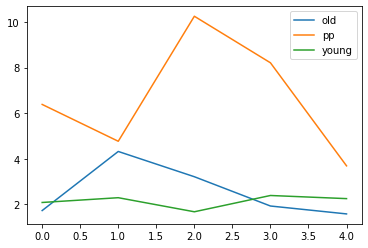

In [128]:
x1 = pd.DataFrame(baseline_dataset.gait_cv.iloc[:5]).reset_index(drop=True)
x2 = pd.DataFrame(baseline_dataset.gait_cv.iloc[5:10]).reset_index(drop=True)
x3 = pd.DataFrame(baseline_dataset.gait_cv.iloc[10:]).reset_index(drop=True)
x = pd.concat([x1, x2, x3],axis=1)
x.columns = ['old','pp','young']
x.plot()

In [87]:
entropy_dataset = dataset_gait.groupby('participant_id').apply(generate_entropy).reset_index(drop=True)
entropy_dataset

,participant_id,approximate_entropy,sample_entrpy,fuzzy_entropy,permutation_entropy,spectral_entropy,dispersion_entropy,increment_entropy,phase_entropy,slope_entropy,label
0,old_1,1.525056,1.890621,0.001368,0.996077,0.138583,2.117856,4.65303,0.78311,0.01365,old_general
1,old_2,1.500463,1.678497,0.011792,0.997877,0.143603,2.101596,4.691704,0.819398,0.373253,old_general
2,old_3,1.487397,1.6634,0.001998,0.996391,0.139913,1.914464,4.616716,0.803155,0.012616,old_general
3,old_4,1.588065,1.9572,0.001856,0.995901,0.138167,2.145991,4.656454,0.797652,0.056292,old_general
4,old_5,1.543311,1.870382,0.001819,0.998306,0.139601,2.188555,4.643471,0.796493,0.027562,old_general
5,parkinson_1,1.011157,1.696014,0.035662,0.999985,0.179883,2.013015,4.507321,0.853104,0.875531,old_parkinson
6,parkinson_2,1.111986,1.511696,0.014821,0.999832,0.169607,2.100744,4.449712,0.80504,0.47956,old_parkinson
7,parkinson_3,0.99859,1.791759,0.075341,0.997453,0.186971,2.105091,4.49997,0.77423,1.509583,old_parkinson
8,parkinson_4,1.179881,1.285878,0.030871,0.999921,0.17323,1.565122,4.571344,0.827975,0.447566,old_parkinson
9,parkinson_5,1.018661,1.909074,0.009637,1.0,0.169624,2.16904,4.620127,0.809611,0.507993,old_parkinson


In [118]:
baseline_dataset.to_csv('gait_baseline_dataset.csv')
entropy_dataset.to_csv('gait_entropy_dataset.csv')

<AxesSubplot:>

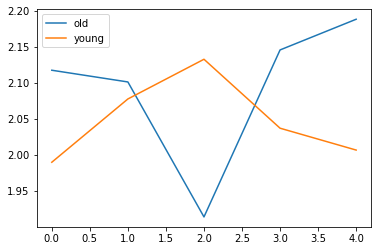

In [125]:
x1 = pd.DataFrame(entropy_dataset.dispersion_entropy.iloc[:5]).reset_index(drop=True)
# x2 = pd.DataFrame(entropy_dataset.spectral_entropy.iloc[5:10]).reset_index(drop=True)
x3 = pd.DataFrame(entropy_dataset.dispersion_entropy.iloc[10:]).reset_index(drop=True)
x = pd.concat([x1,x3],axis=1)
x.columns = ['old','young']
x.plot()